In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.optimize
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

# Test 1: "Observational" data $\rightarrow$ [omch2$\cdot$1.2] and no feedback

In [7]:
pars_test = camb.set_params(H0=67.4, 
                            ombh2=0.0224, 
                            omch2=0.120*1.2, 
                            redshifts=[0], 
                            kmax=10,
                            As=2e-9, 
                            ns=0.96, 
                            halofit_version='mead2020_feedback', 
                            HMCode_A_baryon = 0, 
                            HMCode_eta_baryon = 0, 
                            HMCode_logT_AGN = -10)
results_test = camb.get_transfer_functions(pars_test)
kh_test, _, pk_test = results_test.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)

kh_data = np.delete(kh_test, np.argwhere(kh_test<1e-2))
pk_data = np.delete(pk_test[0], np.argwhere(kh_test<1e-2))

### Creating cosmology based on Planck2018 (no feedback) for reference

In [10]:
pars_planck_2018 = camb.set_params(H0=67.4, ombh2=0.0224, omch2=0.120,
                                  redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                                  halofit_version='mead2020_feedback',
                                  HMCode_A_baryon=0, HMCode_eta_baryon=0, HMCode_logT_AGN=-10)
results_planck_2018 = camb.get_transfer_functions(pars_planck_2018)
kh_planck2018, _, pk_planck2018 = results_planck_2018.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)

kh_2018 = np.delete(kh_planck2018, np.argwhere(kh_planck2018<1e-2))
pk_2018 = np.delete(pk_planck2018, np.argwhere(kh_planck2018<1e-2))

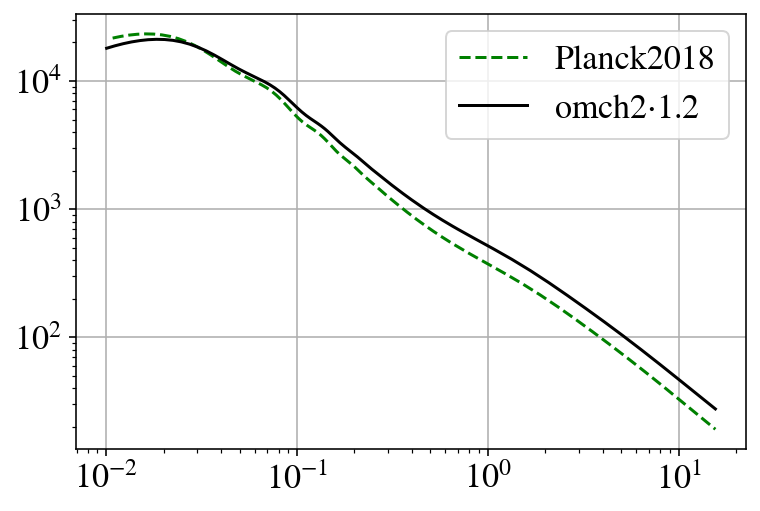

In [17]:
plt.figure()
plt.loglog(kh_2018, pk_2018, 'g', linestyle='--', label='Planck2018')
plt.loglog(kh_data, pk_data, 'k-', label='omch2$\cdot$1.2')
plt.legend()
plt.grid()
plt.show()

### scipy.optimize.curve_fit()

In [19]:
def baryon_model_mead(x_data, A_baryon, eta_baryon, logT_AGN):
    pars = camb.set_params(H0=67.4, ombh2=0.0224, omch2=0.120, redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                           halofit_version='mead', 
                           HMCode_A_baryon = A_baryon, 
                           HMCode_eta_baryon = eta_baryon, 
                           HMCode_logT_AGN = logT_AGN)
    results = camb.get_transfer_functions(pars)
    kh, _ , pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    return np.delete(pk[0], np.argwhere(kh<1e-2))

guesses = np.array([3.13, 0.603, 7.8])
popt_mead, pcov_mead = scipy.optimize.curve_fit(baryon_model_mead, kh_data, pk_data, guesses) 
popt_mead

ValueError: operands could not be broadcast together with shapes (142,) (144,) 

In [20]:
def baryon_model_feedback(xdata, A_baryon, eta_baryon, logT_AGN):
    pars = camb.set_params(H0=67.4, ombh2=0.0224, omch2=0.120, redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                           halofit_version='mead2020_feedback', 
                           HMCode_A_baryon = A_baryon, 
                           HMCode_eta_baryon = eta_baryon, 
                           HMCode_logT_AGN = logT_AGN)
    results = camb.get_transfer_functions(pars)
    kh, _ , pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    return np.delete(pk[0], np.argwhere(kh<1e-2))

guesses = np.array([3.13, 0.603, 7.8])
popt_feedback, pcov_feedback = scipy.optimize.curve_fit(baryon_model_feedback, kh_data, pk_data, guesses)
popt_feedback

ValueError: operands could not be broadcast together with shapes (142,) (144,) 